<a href="https://colab.research.google.com/github/Bzitsman/data-analytics-profolio/blob/main/Emergency_Calls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Emergency - 911 Calls**
This project looks at Emergency - 911 Calls from  Fire, Traffic, EMS for Montgomery County, PA.

The following libaries will be used in this project 


*   Numpy
*   Pandas
*   Seaborn
*   Matplotlib

The data can be found on kaggle at [Emergency - 911 Calls](https://www.kaggle.com/datasets/mchirico/montcoalert)


**Import Libaries**

In [69]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**read in data file**

In [70]:
# the data file I am using is in csv format 
df = pd.read_csv('/content/911.csv')

**Looking at the Data**

In [71]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,99492.0,40.159526,0.094446,30.333596,40.100423,40.145223,40.229008,41.167156
lng,99492.0,-75.317464,0.174826,-95.595595,-75.392104,-75.304667,-75.212513,-74.995041
zip,86637.0,19237.658298,345.344914,17752.000000,19038.000000,19401.000000,19446.000000,77316.000000
e,99492.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looking at the top 5 zip codes

In [74]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Looking at the top 5 Townships

In [75]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Looking to see how many unique title codes there are in the data 

In [76]:
df['title'].nunique()

110

# Creating new features

Next I am creating new features to help with exploring the data

Seperating the Title column into title and Reason.

In [77]:
x = df['title'].iloc[0]

In [78]:
x

'EMS: BACK PAINS/INJURY'

In [79]:
x.split(":")

['EMS', ' BACK PAINS/INJURY']

In [80]:
x.split(":")[0]

'EMS'

In [81]:
df['Department'] = df['title'].apply(lambda title: title.split(':')[0]) # I used the .apply method to and a custom lambda function to make a new column called Department

df['Department']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Department, Length: 99492, dtype: object

Counts of calls for each department

In [82]:
df['Department'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Department, dtype: int64

# *Visualization*

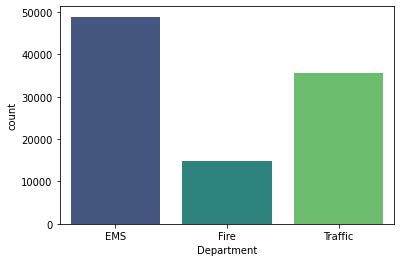

In [83]:
# This shows the total counts for each department's calls
sns.countplot(x='Department', data=df, palette='viridis')

Looking at the Timestamp column and making cleaing it up

In [84]:
# convert timeStamp from str. to a  DateTime objects.
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Create 3 new columns for Hour, Month, and Day of the Week

In [85]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


Using the .map() with a dictionary to map the actual string names to the day of the week will help us to explore the data more

In [86]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'} # this is the dictionary we are using for the days of the week

df['Day of Week'] = df['Day of Week'].map(dmap)

df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


# *Visualization*

countplot of the Day of Week and Month column with the hue based off of the Department column

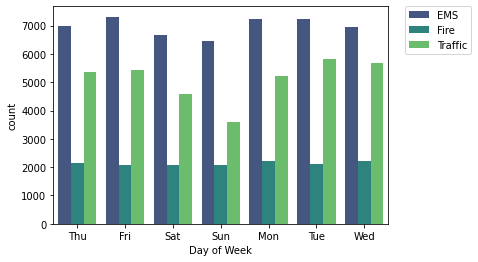

In [87]:
sns.countplot(x='Day of Week',data=df, hue='Department', palette='viridis')

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

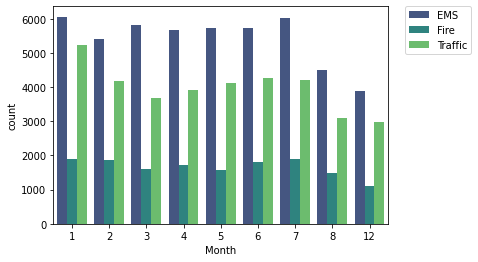

In [88]:
sns.countplot(x='Month',data=df, hue='Department', palette='viridis')

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

 missing some Months 9, 10, and 11
 

In [89]:
byMonth = df.groupby('Month').count()

byMonth.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


# *Visualization*

 simple plot off of the dataframe indicating the count of calls per month

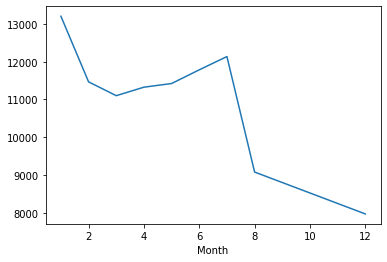

In [90]:
byMonth['lat'].plot()

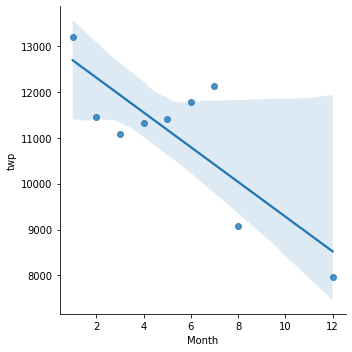

In [91]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

Next pull out the Date to make a new column

In [92]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


# *Visualization*

 3 separate plots with each plot representing the Department that responed to 911 call

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

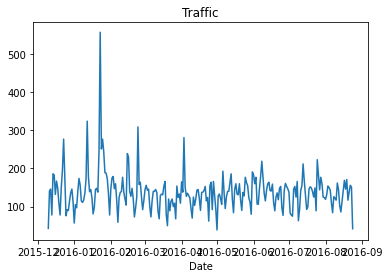

In [93]:
df[df['Department']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

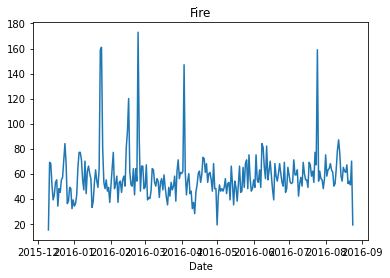

In [94]:
df[df['Department']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

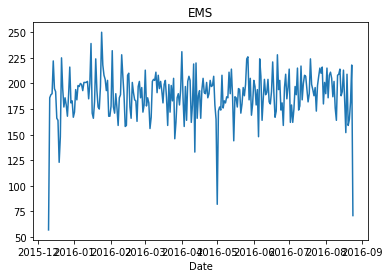

In [95]:
df[df['Department']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout

# *Visualization*

Making heatmaps, using the unstack method to put the data into a Matrix form

In [101]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Department'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


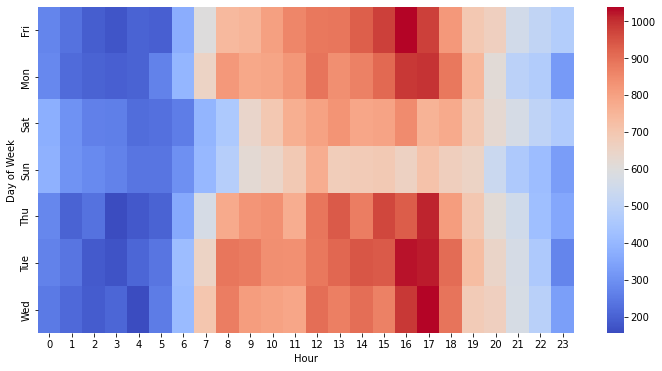

In [102]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='coolwarm')

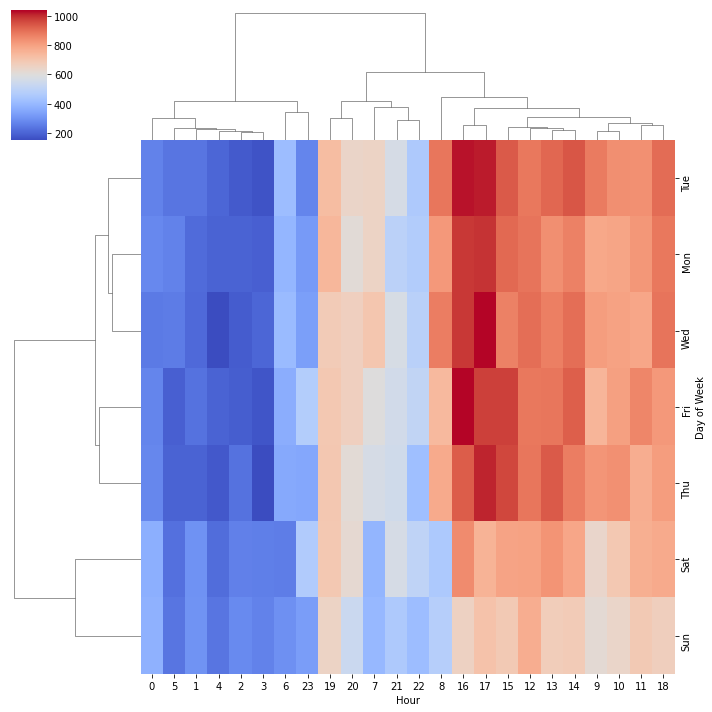

In [103]:
# Cluster Map
sns.clustermap(dayHour, cmap='coolwarm')

From the heatmaps we see that there is a trend of more calls in the evening hour starting around 4pm. Satudary and Sunday have the fewest calls for the week

In [104]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Department'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


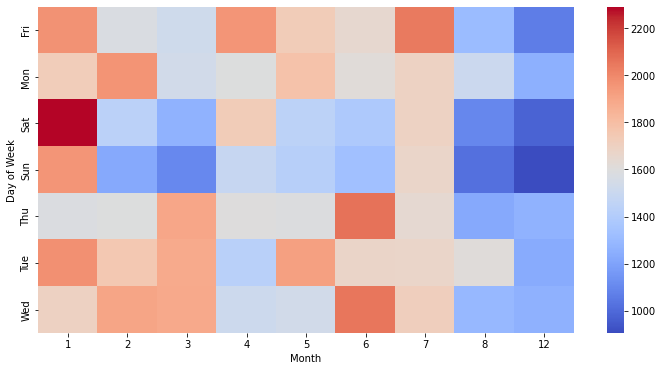

In [107]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='coolwarm')

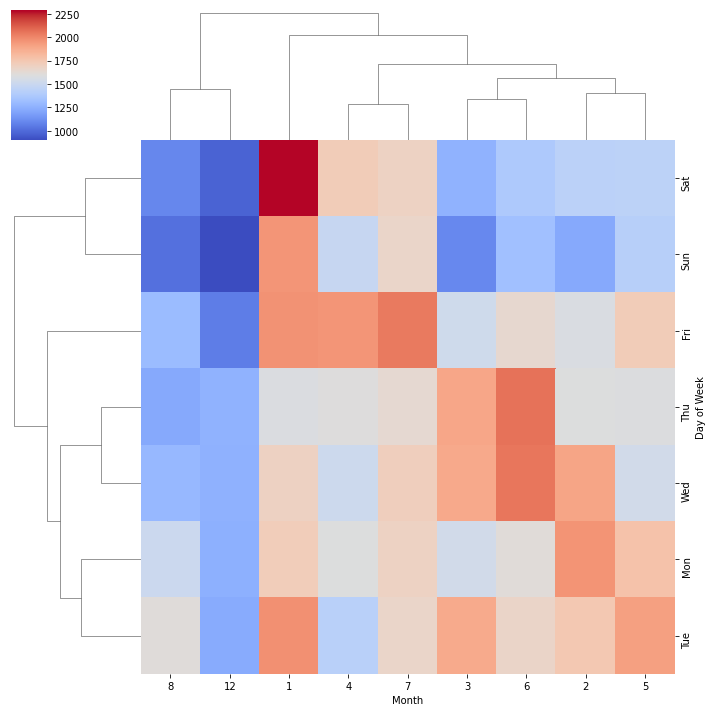

In [108]:
sns.clustermap(dayMonth, cmap='coolwarm')

With the information we have it is a little less clear which month has the most calls as we do not have data for Sept., Oct., and Nov.